# Para iniciarmos o código, vamos importar as bibliotecas necessárias para que construamos a nossa CNN (Convolutional Neural Network)

In [39]:
import os
import zipfile
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Configure TensorFlow and NumPy seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Suppress TensorFlow log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Agora vamos fazer o Download do Dataset de Frutas e Vegetais
Vamos também verificar e extrair o arquivo (Estou fazendo isso porque, muitas vezes durante a implementação, deu problema com o arquivo de imagens...)

In [40]:
# Download the dataset from Kaggle using kagglehub
dataset_path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Dataset file path:", dataset_path)

# Check if the downloaded file is a ZIP and extract it
if dataset_path.endswith('.zip'):
    extracted_path = "./dataset"  # Change this directory if desired
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Dataset extracted to:", extracted_path)
else:
    extracted_path = dataset_path


Dataset file path: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8


Agora vamos listar as pastas do diretório, monstrando também quais os tipos de frutas e vegetais que possuímos no dataset 
Estou fazendo isso pra clarificar, durante a implementação, o tipo de dados com que estou mexendo...

In [41]:
# List the top-level directories in the extracted dataset folder
print("Contents of the extracted dataset folder:")
print(os.listdir(extracted_path))
# Expected output should include: ['test', 'train', 'validation']

# List the contents of the 'train' directory to see the class folders
train_path = os.path.join(extracted_path, "train")
print("Contents of train directory:")
print(os.listdir(train_path))


Contents of the extracted dataset folder:
['test', 'train', 'validation']
Contents of train directory:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Nessa parte do código eu busquei entender qual o nome dos arquivos dentro de cada pasta, além de sinalizar se a imagem procurada foi encontrada.
Essa parte foi importante durante a implementação, porque me ajudou a esclarecer o modelo das imagens, o que facilitou bastante o tratamento delas.

In [42]:
# Construct the full image path using os.path.join.
# Adjust the folder names according to the dataset structure.
# For example, if we want to load an image from the "apple" class in the training set:
img_path = os.path.join(extracted_path, "train", "apple", "Image_1.jpg")
print("Full image path:", img_path)

# Check if the image file exists. If not, print the contents of the 'apple' folder.
if not os.path.exists(img_path):
    print("Image not found. Contents of the 'apple' folder:")
    apple_folder = os.path.join(extracted_path, "train", "apple")
    print(os.listdir(apple_folder))
else:
    print("Image found!")


Full image path: C:\Users\Marcelo\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\apple\Image_1.jpg
Image found!


# Primeira Visualização do Dataset
Nessa parte do código, criei a função de visualizar o dataset.
Primeiramente, escolhi qual o arquivo seria mostrado. Depois mostrei a imagem escolhida.

Contents of 'train/apple':
['Image_1.jpg', 'Image_10.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_2.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_3.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.png', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_5.JPG', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.png', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.png', 'Image_6.jpg', 'Image_60.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg', 'Image_64.jpg', 'Image_65.png', 'Image_67.jpg', 'Image_68.jpg', 'Image_69.jpg', 'Image_7.jpg', 'Image_71.png', 'Image_76.png', 'Image_78.jpg', 'Image_80.jpg', 'Image_81.png', 'I

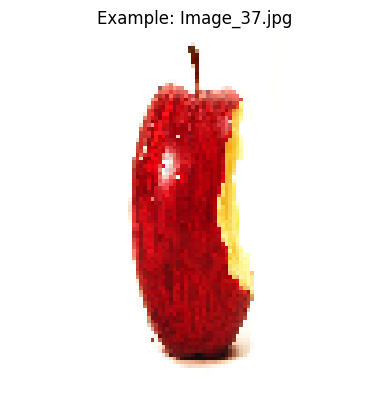

In [43]:
# Cell: List files in 'train/apple' and display an image

# Construct the path to the 'apple' folder in the training set
apple_folder = os.path.join(extracted_path, "train", "apple")
print("Contents of 'train/apple':")
files = os.listdir(apple_folder)
print(files)

# Check if there are any files and choose the first one as an example
if len(files) > 0:
    chosen_file = files[22] 
    img_path = os.path.join(apple_folder, chosen_file)
    print("Using image file:", chosen_file)
    
    # Load the image with a target size of 100x100 pixels
    img = load_img(img_path, target_size=(100, 100))
    img_array = img_to_array(img)
    
    # Display the image using matplotlib
    plt.imshow(img_array.astype('uint8'))
    plt.title(f"Example: {chosen_file}")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the 'train/apple' folder.")


# Visualização de Dados Randomicos
Nessa função, me atentei a mostrar diferentes tipos de imagens presentes no dataset.
Portanto, essa função retorna imagens "aleatórias" do dataset, mostrando a diversidade dos dados presentes.
Isso é de suma importância, porque nos ajuda a entender o tipo de dados que usamos.
Experimente rodar essa cell várias vezes...

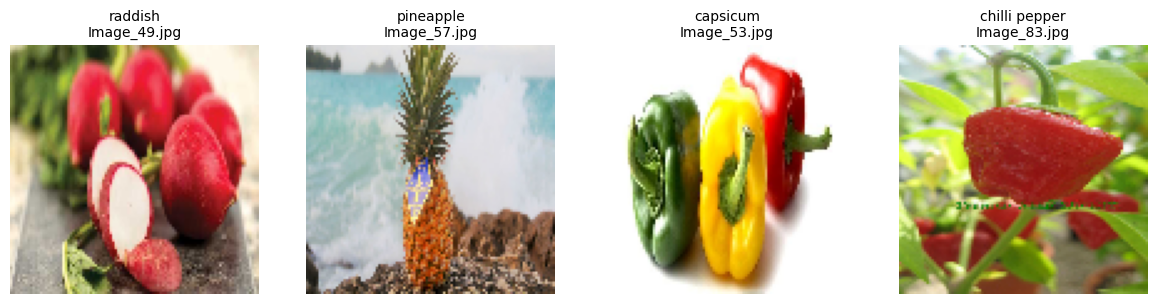

In [44]:
#This function returns 04 random fruits/vegetables from the dataset.
#The importance of it is to visualize the dataset and show how the data is.
import random

def show_random_fruits(parent_directory, num_images=4, target_size=(100, 100)):
    """
    Displays a specified number of random fruit images from any subfolder within the parent directory.
    
    Parameters:
    - parent_directory: The directory containing subfolders for each fruit class (e.g., 'train').
    - num_images: Number of random images to display.
    - target_size: Tuple representing the target image size (width, height) for resizing images.
    """
    # Get a list of all subdirectories (each representing a fruit class)
    subfolders = [os.path.join(parent_directory, d) 
                  for d in os.listdir(parent_directory) 
                  if os.path.isdir(os.path.join(parent_directory, d))]
    
    # Create a list to store all image paths along with their folder (class) names
    image_paths = []
    for folder in subfolders:
        files = os.listdir(folder)
        for file in files:
            full_path = os.path.join(folder, file)
            # Consider only common image file extensions
            if full_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append((folder, full_path))
    
    if len(image_paths) == 0:
        print("No image files found in any subdirectory of", parent_directory)
        return
    
    # Adjust the number of images if fewer are available
    if len(image_paths) < num_images:
        num_images = len(image_paths)
    
    # Randomly sample 'num_images' images from the list
    chosen_images = random.sample(image_paths, num_images)
    
    # Plot the selected images
    plt.figure(figsize=(num_images * 3, 3))
    for i, (folder, path) in enumerate(chosen_images):
        try:
            img = load_img(path, target_size=target_size)
            img_array = img_to_array(img)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_array.astype('uint8'))
        # Use the folder name as the class label
        fruit_class = os.path.basename(folder)
        plt.title(f"{fruit_class}\n{os.path.basename(path)}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Assuming your extracted dataset has a 'train' folder
train_folder = os.path.join(extracted_path, "train")
show_random_fruits(train_folder, num_images=4, target_size=(100, 100))


# Criando a CNN (Convolutional Neural Network)

Importando Bibliotecas úteis

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory

Inicializando a CNN

In [73]:
# Create a new Sequential model
classifier = Sequential()

Adicionando Camadas Convolucionais 

In [80]:
classifier.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 1, 32)`, `kernel shape=(3, 3, 32, 32)`, `dilation_rate=[1 1]`.

Processo de Flattening 
* Após as camadas convolucionais e de pooling, temos dados em formato 3D (altura × largura × profundidade)
* O Flattening converte essa matriz 3D em um vetor 1D (unidimensional) --> Nesse caso, a matriz 100x100x3 vira um vetor de 30000 elementos (100x100x3 = 30000)


In [49]:
classifier.add(Flatten())

Adicionando Camadas Conectadas

In [64]:
# Dense Layers
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))  # Add dropout to prevent overfitting
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))  # Add dropout to prevent overfitting
classifier.add(Dense(36, activation='softmax'))  # 36 classes output
#Aqui usaremos 36 unidades porque estamos trabalhando com 36 classes diferentes. E, além disso, estamos usando a função softmax,
#pois estamos lidando com dadods de múltiplas classes. (Caso fossem só 02, usaríamos a função sigmoid, por exemplo.)


Compilando o modelo
* Usaremos o a função de compilar utilizando um otimizador adam, que consiste em um algoritmo eficiente para a mudança de pesos de uma rede durante o treinamento.
* Além disso, usaremos a loss function categorial, que calcula a diferença entre a classificação real e a classificação esperada

In [52]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Treinando o Modelo

Evitando o Overfitting

O overfitting é um problema em que o modelo captura ruídos como parte específica do dataset, transformando em "requerimentos" para a avaliação.
Isso é um problema que deve ser contornado realizando as possíveis alterações:
* Rotação das imagens do dataset
* Distorção das imagens alterando alguns pixels
* Aumentando ou diminuindo as imagens
* "Flip" horizontal ou vertical
* Ajuste de Brilho e Contraste

In [61]:
train_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "train"), 
    labels='inferred',
    label_mode='categorical',  #Categorical porque estamos trabalhando com um problema de 36 classes.
    image_size=(100, 100),
    batch_size=32, #Batch é o número de amostras que serão processadas antes de atualizar os parâmetros do modelo durante o treinamento.
    #Estamos usando 32 de tamanho, porque é um número considerado razoável, e bastante utilizado. (Números maiores iriam requerir muita memória)
    shuffle=True
)
#A função image_dataset_from_directory() é uma função do TensorFlow que prepara os dados de imagem para treinamento/teste
#O parâmetro Shuffle embaralha aleatoriamente as imagens antes de cada época, o que reduz o risco de overfitting, melhorando, assim,
#a generalização do modelo

Found 3115 files belonging to 36 classes.


In [67]:
# Create test dataset
test_dataset = image_dataset_from_directory(
    os.path.join(extracted_path, "test"),  # Using the test directory
    labels='inferred',
    label_mode='categorical',
    image_size=(100, 100),
    batch_size=32,
    shuffle=True
)

Found 359 files belonging to 36 classes.
